In [ ]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data_frame = pd.read_csv("gdrive/My Drive/43.6.txt", delimiter="\t")

data_frame = data_frame.drop(axis = "columns", columns = "Year")
data_frame = data_frame.rename(columns={'Single Race 6': 'Race', 'Year Code' : 'Year' })
data_frame = data_frame[data_frame['Year'] != 2023]

In [ ]:
data_frame=data_frame.replace("Unreliable",np.nan)
data_frame[data_frame["Gender"] == "Female"]

,Notes,Gender,Gender Code,Year,Deaths,Population,Crude Rate
0,NaN,Female,F,2018.0,3775.0,1.660388e+08,2.3
1,NaN,Female,F,2019.0,4733.0,1.665822e+08,2.8
2,NaN,Female,F,2020.0,6890.0,1.672279e+08,4.1
3,NaN,Female,F,2021.0,9218.0,1.675090e+08,5.5
4,NaN,Female,F,2022.0,9499.0,1.680040e+08,5.7
6,Total,Female,F,NaN,40593.0,1.171370e+09,3.5


In [ ]:
CF2 = data_frame[(data_frame["Gender"] == "Female")&
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CM2 = data_frame[(data_frame["Gender"] == "Male")&
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CF = data_frame[(data_frame["Gender"] == "Female")&
           (data_frame["Notes"] != "Total")] [["Year", "Crude Rate"]].astype(float)
CM = data_frame[(data_frame["Gender"] == "Male")&
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)

In [ ]:
x1=CF2["Year"]
y1=CF2["Crude Rate"]
x1c=CF["Year"]

x2=CM2["Year"]
y2=CM2["Crude Rate"]
x2c=CM["Year"]

In [ ]:
xr=CM2["Year"]
yr=CM2["Crude Rate"].div(CF2["Crude Rate"].values)

In [ ]:
coeffF = np.polyfit(x1, y1, 2)
yfitF = np.polyval(coeffF,x1)
resF = np.sum((y1  - yfitF)**2)
coeffM = np.polyfit(x2, y2, 2)
yfitM = np.polyval(coeffM,x2)
resM = np.sum((y2  - yfitM)**2)

#stdF = np.sqrt(resF/5)
#stdM = np.sqrt(resM/5)

stdF = np.sqrt(resF/(len(y1)-3))
stdM = np.sqrt(resM/(len(y2)-3))

([<matplotlib.axis.XTick at 0x791a1bc10430>,
 [Text(2018.0, 0, '2018'),
  Text(2019.0, 0, '2019'),
  Text(2020.0, 0, '2020'),
  Text(2021.0, 0, '2021'),
  Text(2022.0, 0, '2022')])

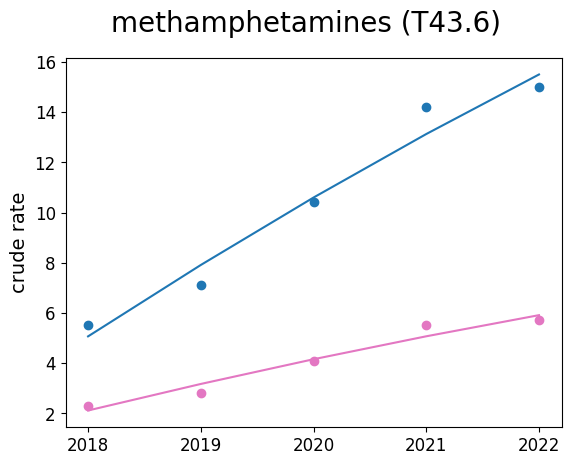

In [ ]:
plt.plot(x1c, np.polyval(coeffM,x1c), color='tab:blue')
plt.scatter(x2,y2, color='tab:blue')

plt.plot(x1c, np.polyval(coeffF,x1c), color='tab:pink')
plt.scatter(x1,y1, color='tab:pink')

plt.suptitle('methamphetamines (T43.6)', fontsize=20)
#plt.legend(["female", "male"],frameon=False, fontsize = 18)
plt.ylabel("crude rate", fontsize = 18)

#plt.yticks(np.arange(1.0, 5.1, 1.0))
plt.yticks(fontsize=12, rotation=0)
plt.xticks(fontsize=12, rotation=0)
#plt.xlabel("year", fontsize=14)
plt.ylabel("crude rate", fontsize=14)
plt.xticks(np.arange(2018, 2022.5, 1.0))

#plt.savefig('AttemptT43.6b_R.png')